# Your Sound vs REAL PIANO 

Here we are going to use SciPy to load the real piano sound ad use Matplotlib to plot the waves

In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

## Read the Wav File

In [2]:
sr, signal = wavfile.read('assets/piano_c.wav')

In [3]:
sr

44100

In [8]:
import IPython.display as idp

idp.Audio(signal, rate = sr)

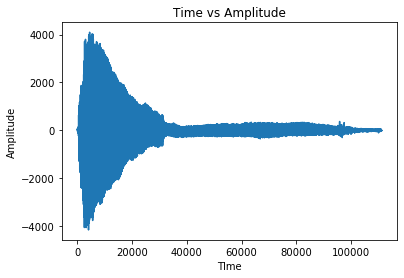

In [6]:
plt.plot(signal)
plt.xlabel('TIme')
plt.ylabel('Amplitude')
plt.title('Time vs Amplitude')
plt.show()

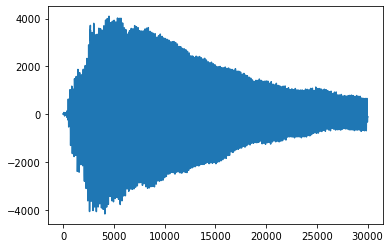

In [11]:
plt.plot(signal[:30000])

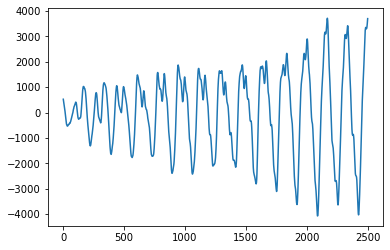

In [13]:
plt.plot(signal[500:3000])

### This is also a C Note but compare it to our previous C Note (Sin Wave)

## Observations 

    1. The wave doen't have a fixed Amplitude
    2. Wave isn't as smooth as a sine wave
    3. Presence of Variable Frequency suspected! 
  
### Let's check it's frequencies

    Our portal from time domain to Frequency domain is Fourier Transform

In [14]:
import numpy as np

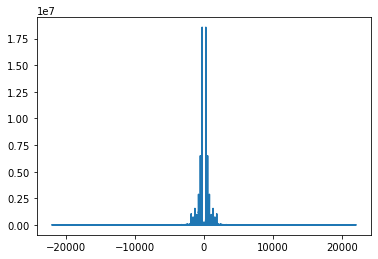

In [23]:
t = np.arange(signal.shape[0])

f = np.fft.fftfreq(t.shape[-1]) * sr  # frequency bin centers in cycles per unit of the sample spacing
s = np.fft.fft(signal) # Fast Fourier Transform 

plt.plot(f, abs(s.real))

    But this makes not sense right now. 
    Let's take the right half only (from 0 to 2000hz)

[]

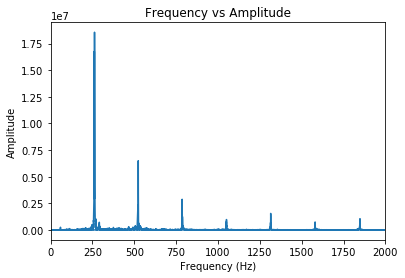

In [24]:
plt.plot(f, abs(s.real))
plt.xlim((0, 2000))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency vs Amplitude')
plt.plot()

    Now this makes some sense
    Let's look at the frequencies(PEAKS) we detected - 
    ~260Hz, ~530Hz, ~780Hz
    
    All these frequencies are close to C notes in different octaves
    
    Note: Other small signals are noise.(as seen in range(0 - 500Hz) 

### So now we see that in a real piano, we not only hear, say, C3 but also some of C4 C5 C6 ....
    Though the magnitudes are less

## This is known as Overtone
    Any frequency greater than fundamental frequency. Also called Harmonics.
    
## Now let's perform some analysis

In [40]:
index = np.where(f > 0)[0] # Could have been arange(1, 55604)
index

array([    0,     1,     2, ..., 55601, 55602, 55603], dtype=int64)

In [29]:
f = f[index]
f

array([3.96547073e-01, 7.93094146e-01, 1.18964122e+00, ...,
       2.20488104e+04, 2.20492069e+04, 2.20496035e+04])

In [42]:
s = s[index]
s

array([-1431.54010052+2320.51714671j, -1003.37990184 -769.87975616j,
       -1922.72133487+1365.82671452j, ...,   101.04615618 +443.49249766j,
        -375.46373418 +232.94905086j,  -264.86652967 +332.77542473j])

In [31]:
# Get the dominant Frequencies

sort = np.argsort(-abs(s.real))[:100]
dom_freq = f[sort]
dom_freq

array([ 262.5141624 ,  261.32452118,  262.91070947,  260.9279741 ,
        263.30725654,  260.53142703,  263.70380361,  262.11761532,
        260.13487996,  523.83868357,  264.10035069,  259.73833288,
        264.49689776,  259.34178581,  524.23523064,  261.72106825,
        785.95629889,  264.89344483,  258.94523874,  785.55975182,
        523.04558943,  258.54869166,  524.63177772,  265.28999191,
        522.64904235,  521.45940113,  521.85594821,  521.06285406,
        522.25249528,  265.68653898,  258.15214459,  520.66630699,
        520.26975991, 1314.95009442,  785.16320475,  519.87321284,
        257.75559752,  787.54248719,  519.47666577,  257.35905045,
       1315.34664149,  787.93903426,  519.08011869,  266.08308605,
        786.35284597,  256.96250337, 1848.30590774,  786.74939304,
        270.44510386,  518.68357162,  788.33558133, 1050.84974373,
        270.04855678,  255.77286215,  270.84165093,  256.5659563 ,
        269.65200971,  268.85891557,  269.25546264,  256.16940

### Now let's calculate the Amplitude Ratio    

In [33]:
freq_ratio = np.round(dom_freq / 261.65)  # 261.65Hz is the frequency of C3 
unique_freq_ratio = np.unique(freq_ratio)

amp_ratio = abs(s.real[sort]/np.sum(s.real[sort]))
factor = np.zeros((int(unique_freq_ratio[-1]), ))

for i in range(factor.shape[0]):
    index = np.where(freq_ratio==i+1)[0]
    factor[i] = np.sum(amp_ratio[index])

factor = factor/np.sum(factor)

In [34]:
factor

array([0.73168812, 0.16083298, 0.06460201, 0.00744849, 0.0174458 ,
       0.00318635, 0.01479625])

In [51]:
np.sum(factor)

0.9999999999999998